In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

### In this experiment we are goint to teleport the quantum state of q0 to q2

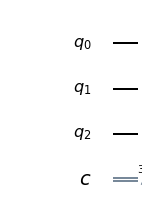

In [2]:
# Create a circuit
circuit = QuantumCircuit(3, 3)
circuit.draw(output="mpl")

### Set the initial state

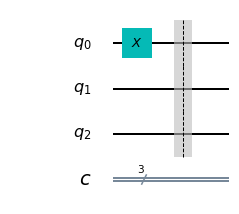

In [3]:
# Set q0 to 1 (We are going to teleport the state 1 to q2)
circuit.x(0)
circuit.barrier()
circuit.draw(output="mpl")

### Build the teleportation circuit

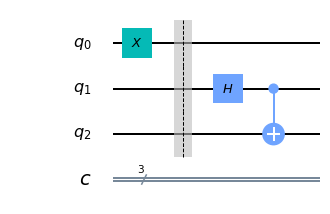

In [4]:
# Create entanglement between q1 and q2
circuit.h(1)
circuit.cx(1, 2)
circuit.draw(output="mpl")

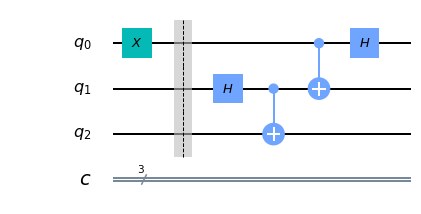

In [5]:
circuit.cx(0, 1)
circuit.h(0)
circuit.draw(output="mpl")

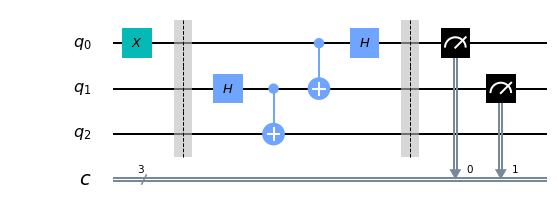

In [6]:
circuit.barrier()
circuit.measure([0, 1], [0, 1])
circuit.draw(output="mpl")

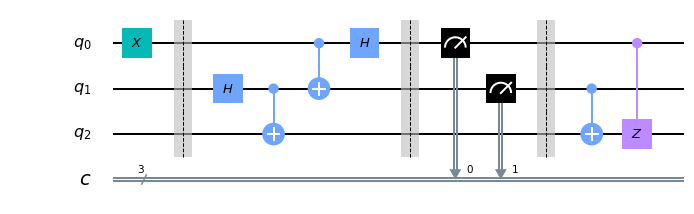

In [7]:
circuit.barrier()
circuit.cx(1, 2)
circuit.cz(0, 2)
circuit.draw(output="mpl")

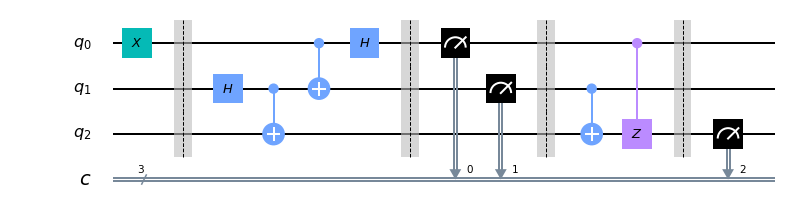

In [8]:
circuit.barrier()
# Get the final measure from q2
circuit.measure(2, 2)
circuit.draw(output="mpl")

### Execute the circuit and show results

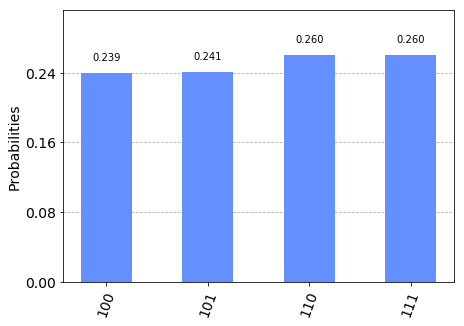

In [9]:
# Get the backend that simulates a quantum computer
simulator = Aer.get_backend("qasm_simulator")
# Execute the experiment 1024 times and get the results
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()
# Show the count of the results for the 1024 experiments
plot_histogram(counts)

### Note that in the previous chart all the states start by 1, this is the value of q2 because it is shown in reverse order. So we teleported the state 1 from q0 to q2.